In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px

In [2]:
df = pd.read_csv('../../Combine_Data/men/vt_encoded.csv')


In [3]:
df.duplicated().sum()

0

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     126 non-null    object 
 1   D        126 non-null    float64
 2   E        126 non-null    float64
 3   ND       126 non-null    float64
 4   Total    126 non-null    float64
 5   D.1      126 non-null    float64
 6   E.1      126 non-null    float64
 7   ND.1     126 non-null    float64
 8   Total.1  126 non-null    float64
 9   year     126 non-null    int64  
 10  Average  126 non-null    float64
 11  medal    126 non-null    int64  
 12  Name     126 non-null    int64  
 13  Nation   126 non-null    int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 13.9+ KB


In [5]:
df.describe()

,D,E,ND,Total,D.1,E.1,ND.1,Total.1,year,Average,medal,Name,Nation
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,5.358730,8.746802,-0.041270,14.064262,5.068254,8.437333,-0.051587,13.454000,2019.293651,13.759131,0.039683,41.809524,22.547619
std,0.572611,0.924239,0.087882,1.410195,1.108559,1.790768,0.096940,2.830872,0.580585,1.859893,0.195992,24.211969,11.572109
min,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,-0.300000,0.000000,2018.000000,0.000000,0.000000,0.000000,0.000000
25%,5.200000,8.633000,0.000000,13.754000,5.200000,8.600000,-0.100000,13.462500,2019.000000,13.595500,0.000000,21.250000,14.250000
50%,5.400000,8.958000,0.000000,14.300000,5.200000,8.933000,0.000000,14.241500,2019.000000,14.199750,0.000000,42.500000,25.000000
75%,5.600000,9.166000,0.000000,14.657750,5.600000,9.091500,0.000000,14.500000,2020.000000,14.557750,0.000000,61.000000,34.750000
max,6.000000,9.533000,0.000000,15.300000,6.000000,9.500000,0.000000,15.000000,2020.000000,15.016500,1.000000,84.000000,37.000000


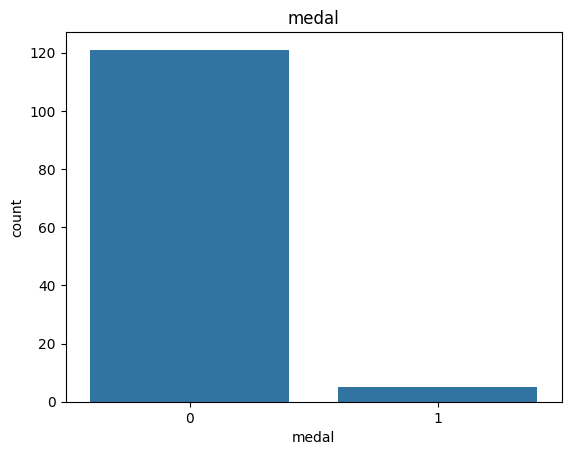

In [6]:
sns.countplot(x='medal', data=df)
plt.title('medal')
plt.show()

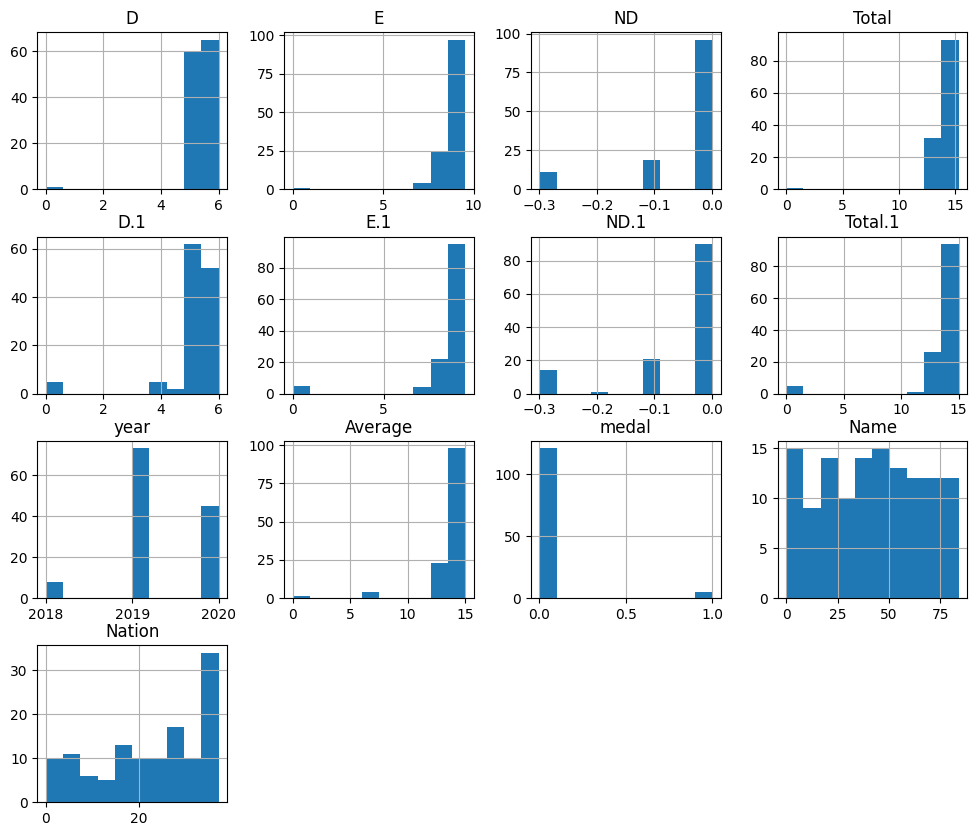

In [7]:
df.hist(figsize=(12, 10))
plt.show()

IndexError: index 9 is out of bounds for axis 0 with size 9

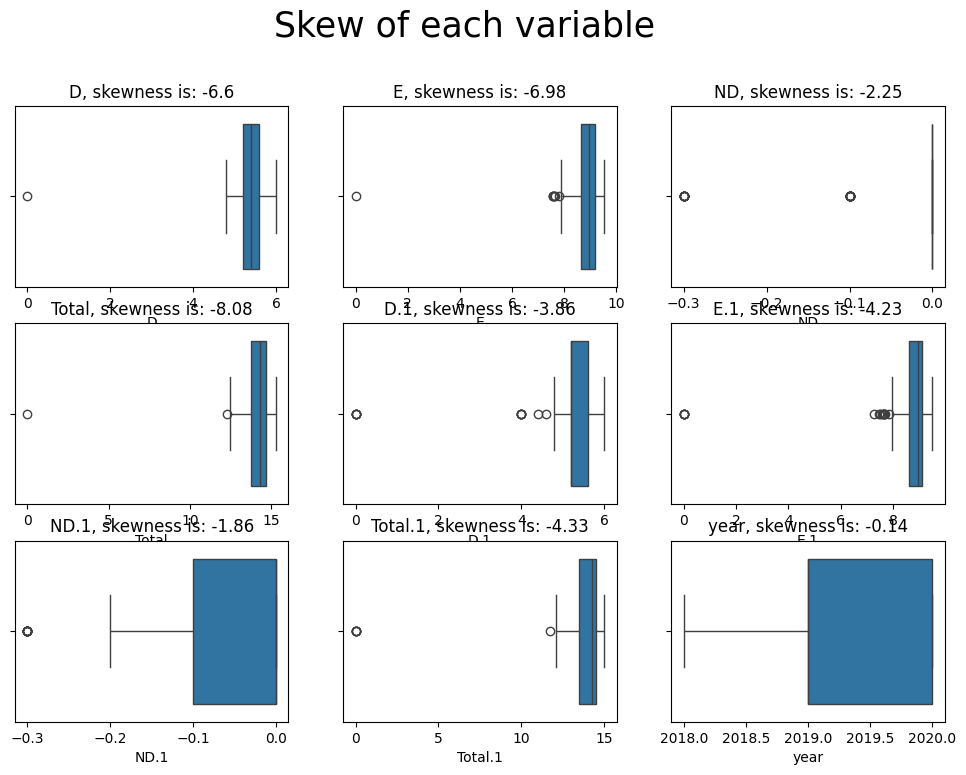

In [8]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(12,8))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()

    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis=0, skipna=True),2)))

boxplots_custom(dataset=df, columns_list=numeric_columns, rows=3, cols=3, suptitle='Skew of each variable')
plt.tight_layout()
plt.show()

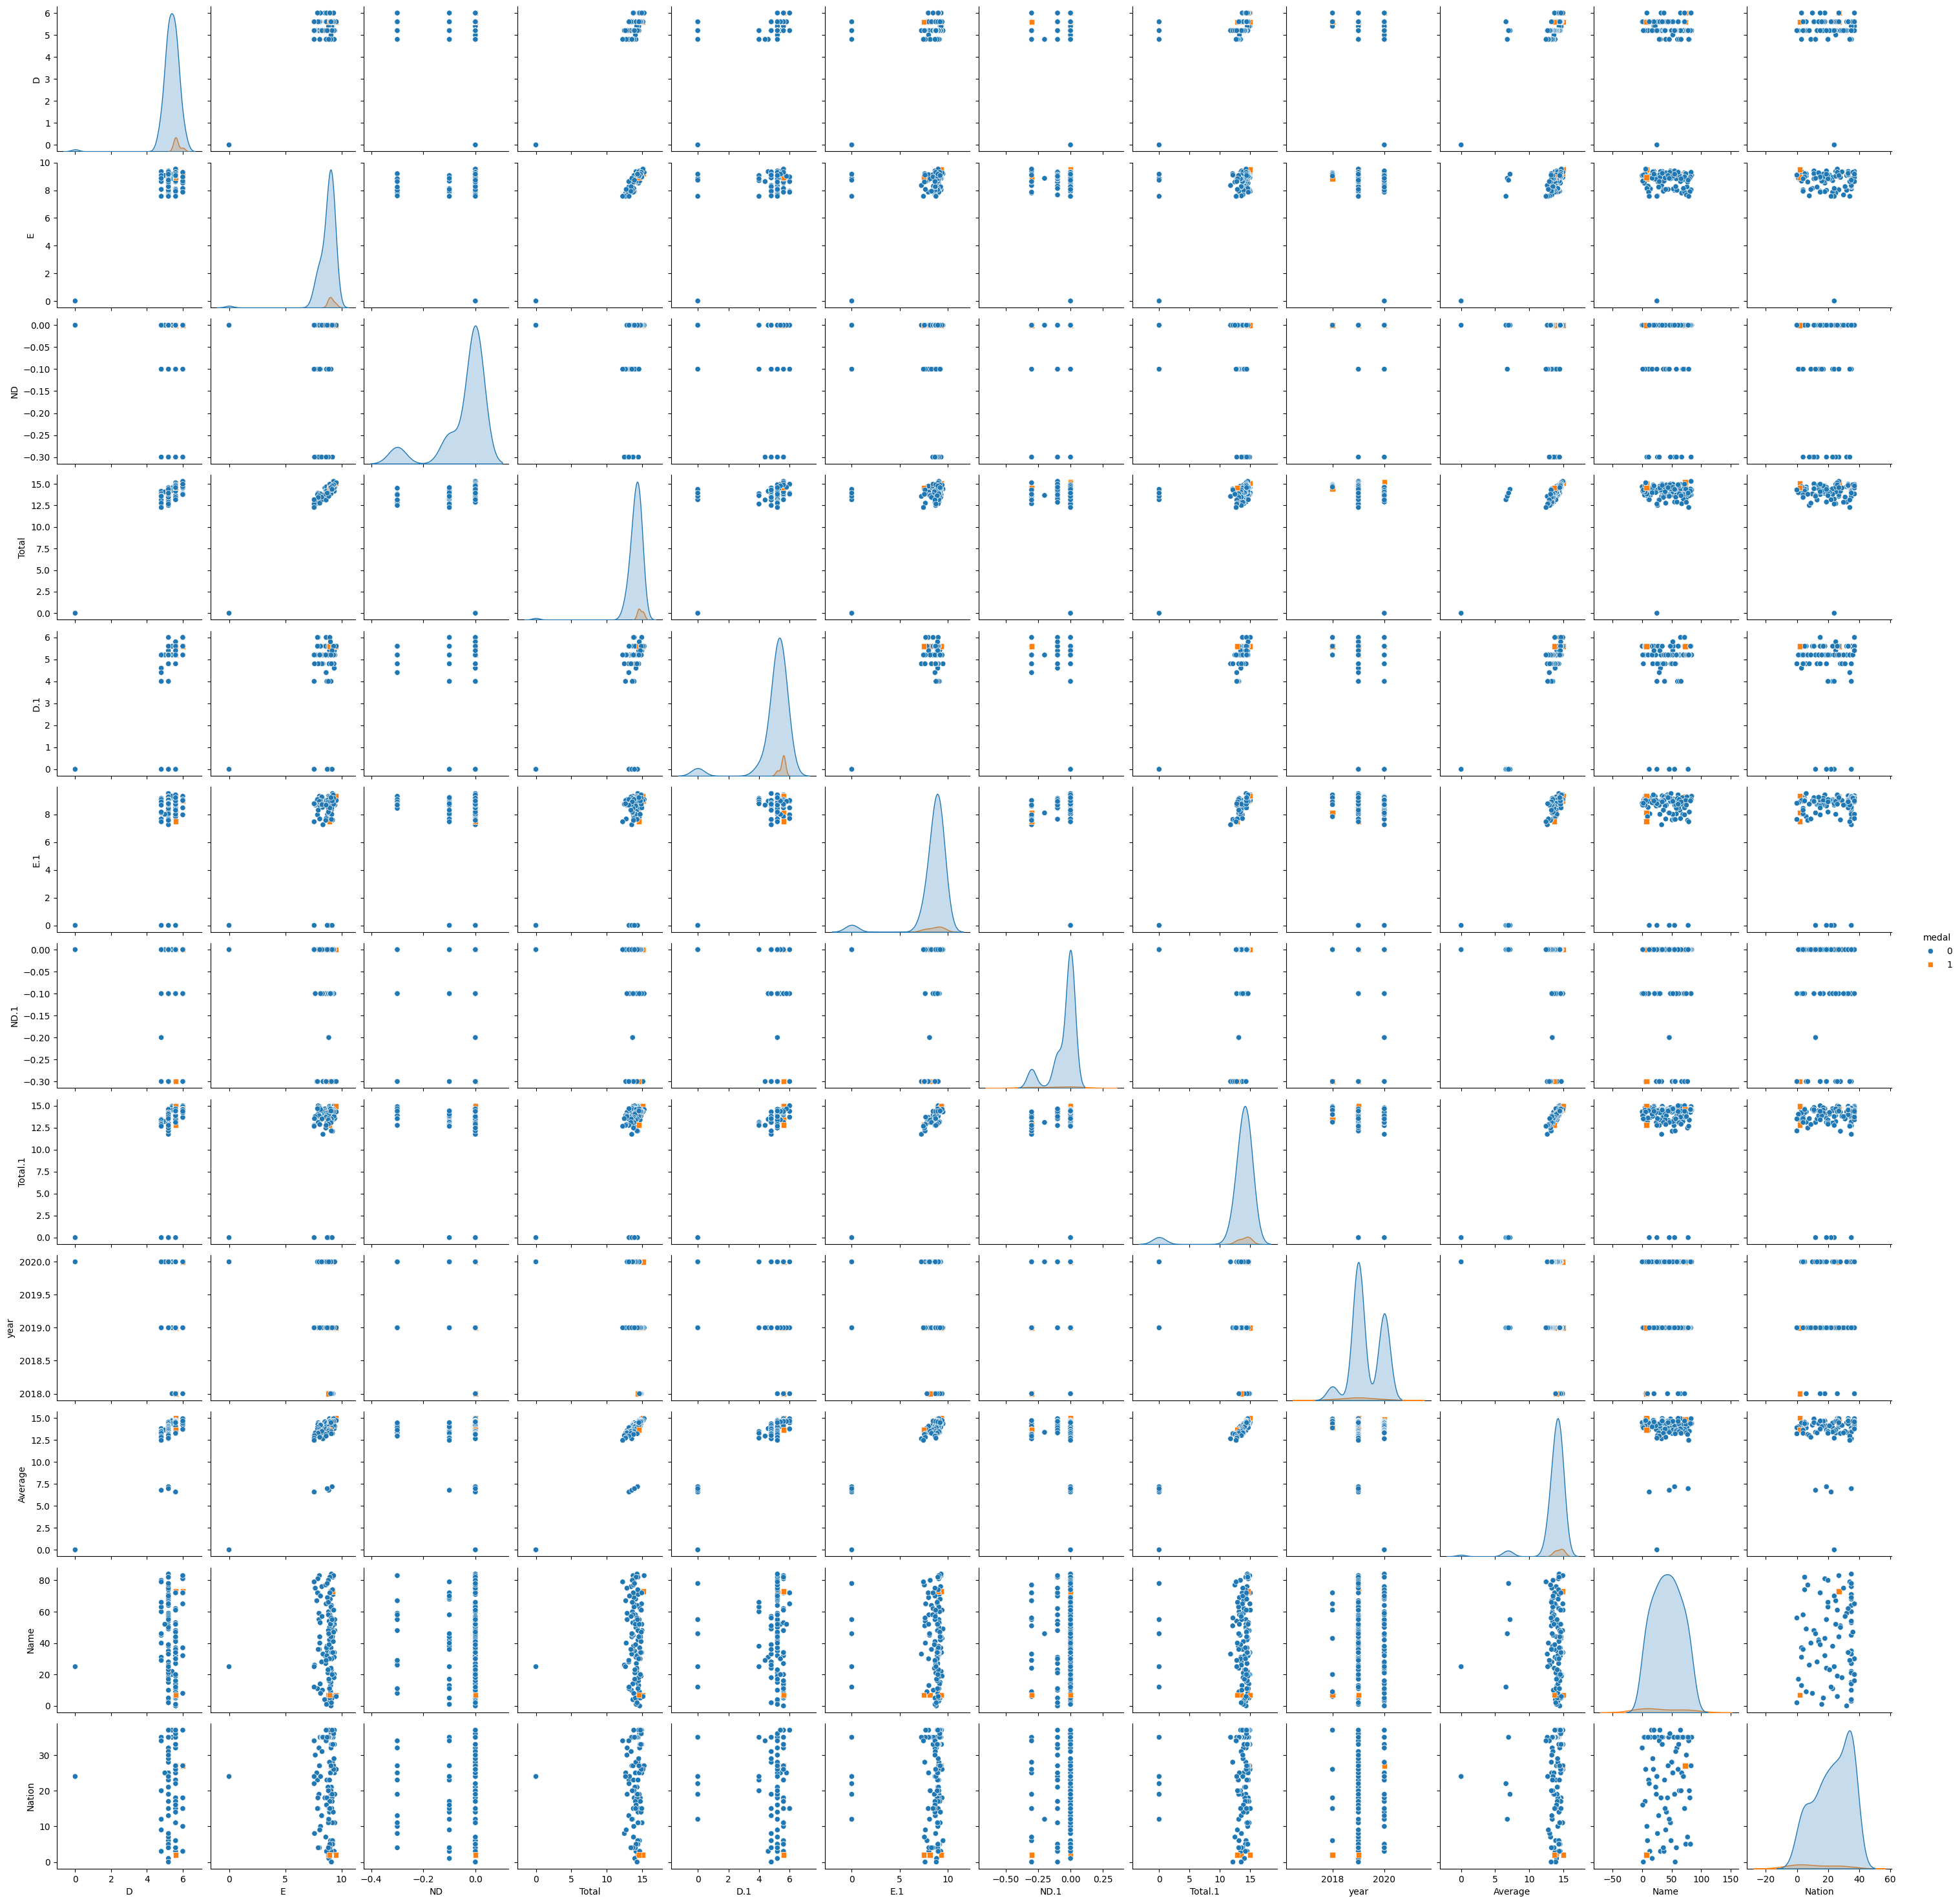

In [9]:
sns.pairplot(df, hue='medal', diag_kind='kde', markers=["o", "s"])
plt.show()

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_88776/2287681465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


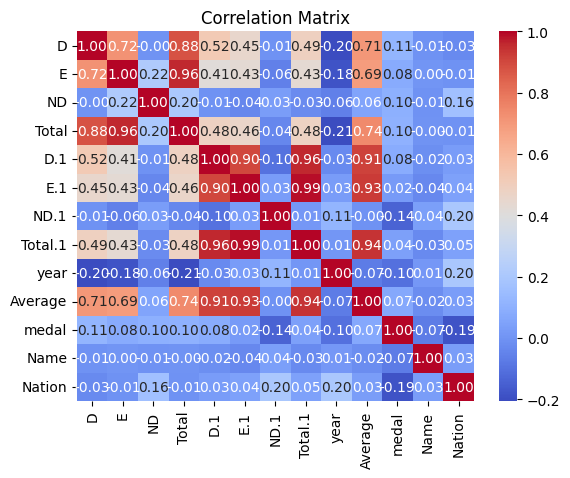

In [10]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

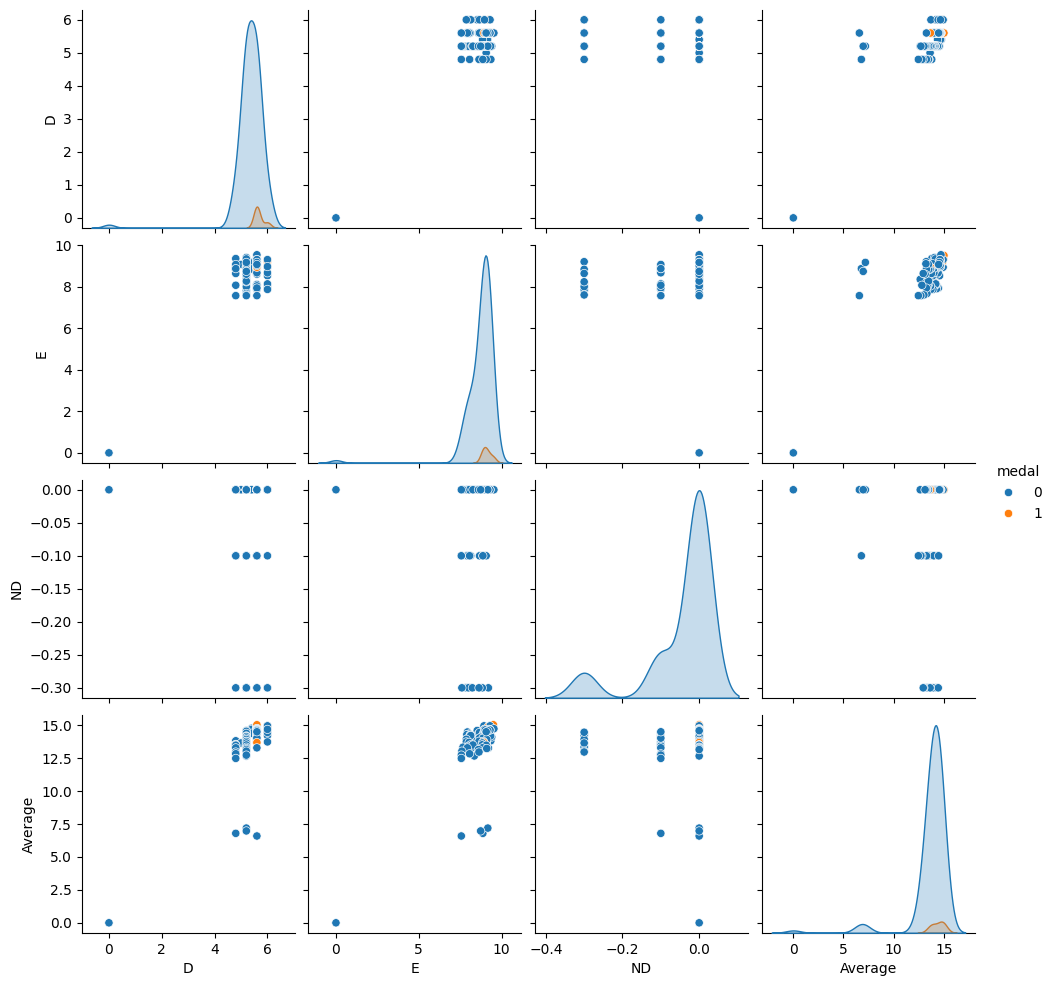

In [12]:
selected_features = ['D', 'E', 'ND', 'Average', 'medal']
sns.pairplot(df[selected_features], hue='medal')
plt.show()